In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Bike Details Dataset:

df = pd.read_csv('BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [23]:
# 1. What is the range of selling prices in the dataset?

def price_range(df):
    return df["selling_price"].max() - df["selling_price"].min()

print("Range of selling Price:", price_range(df))
print("Max Selling price:" , df["selling_price"].max())
print("Min Selling price:" , df["selling_price"].min())

Range of selling Price: 755000
Max Selling price: 760000
Min Selling price: 5000


In [24]:
df["Range of selling Price"] = df["selling_price"].max() - df["selling_price"].min()

print("Max Selling price:" , df["selling_price"].max())
print("Mim Selling price:" , df["selling_price"].min())
print("Range of selling Price:" , df["Range of selling Price"].max())



Max Selling price: 760000
Mim Selling price: 5000
Range of selling Price: 755000


In [25]:
# 2. What is the median selling price for bikes in the dataset?

def Median_Selling_Price(df):
    return df["selling_price"].median()

print("Median Selling Price:" , Median_Selling_Price(df))


Median Selling Price: 45000.0


In [26]:
# 3. What is the most common seller type?

def Most_Common_Seller_Type(df):
    return df["seller_type"].value_counts().idxmax()

print("Most Common Seller Type:" , Most_Common_Seller_Type(df))


Most Common Seller Type: Individual


In [27]:
# 4. How many bikes have driven more than 50,000 kilometers?

def Bikes_Driven_More_Than_50000(df):
    return len(df[df["km_driven"] > 50000])

print("Bikes Driven More Than 50000:" , Bikes_Driven_More_Than_50000(df))

Bikes Driven More Than 50000: 170


In [28]:
# 5. What is the average km_driven value for each ownership type?

def  Average_Km_Driven_For_Each_Ownership_Type(df):
    return df.groupby("owner")["km_driven"].mean()

print("Average Km Driven For Each Ownership Type:" , Average_Km_Driven_For_Each_Ownership_Type(df))

Average Km Driven For Each Ownership Type: owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [29]:
# 6. What proportion of bikes are from the year 2015 or older?

def Proportion_Of_Bikes_From_Year_2015_Or_Older(df):
    return (df["year"] <= 2015).mean()

print("Proportion Of Bikes From Year 2015 Or Older:" , Proportion_Of_Bikes_From_Year_2015_Or_Older(df))

Proportion Of Bikes From Year 2015 Or Older: 0.5664467483506126


In [30]:
# 7. What is the trend of missing values across the dataset?

def Trend_Of_Missing_Values(df):
    return df.isnull().sum()

print("Trend Of Missing Values:" , Trend_Of_Missing_Values(df))

Trend Of Missing Values: name                        0
selling_price               0
year                        0
seller_type                 0
owner                       0
km_driven                   0
ex_showroom_price         435
Range of selling Price      0
dtype: int64


In [31]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?

def Highest_ex_showroom(df):
    max_ex = df["ex_showroom_price"].max()
    bikes = df.loc[df["ex_showroom_price"] == max_ex, "name"].unique()
    return max_ex, bikes

max_ex, bikes = Highest_ex_showroom(df)
print("Highest ex_showroom_price recorded:", max_ex)
print("Bike(s) with highest ex_showroom_price:", bikes)

Highest ex_showroom_price recorded: 1278000.0
Bike(s) with highest ex_showroom_price: ['Harley-Davidson Street Bob']


In [32]:
# 9. What is the total number of bikes listed by each seller type?

def Count_by_seller_type(df):
    return df["seller_type"].value_counts()

print("Total number of bikes listed by each seller type:")
print(Count_by_seller_type(df))

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [33]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?

def Relationship_between_selling_price_and_km_driven_for_first_owner_bikes(df):
    first_owner_bikes = df[df["owner"] == "First Owner"]

print("Relationship between selling_price and km_driven for first-owner bikes:" , Relationship_between_selling_price_and_km_driven_for_first_owner_bikes(df))

Relationship between selling_price and km_driven for first-owner bikes: None


In [34]:
# 11. Identify and remove outliers in the km_driven column using the IQR method?

def remove_outliers(df):
    Q1 = df["km_driven"].quantile(0.25)
    Q3 = df["km_driven"].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df["km_driven"] >= lower) & (df["km_driven"] <= upper)]
    return df

print("Rows after outlier removal:", remove_outliers(df))

Rows after outlier removal:                                      name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_show

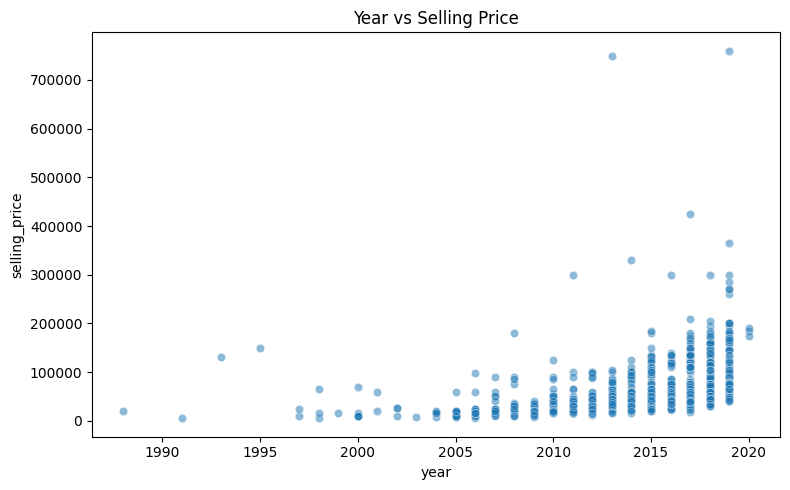

In [35]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="year", y="selling_price", alpha=0.5)
plt.title("Year vs Selling Price")
plt.tight_layout()
plt.show()

In [36]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

def Avg_depreciation(df, current_year):
    age = current_year - df["year"]
    dep_per_year = (df["ex_showroom_price"] - df["selling_price"]) / age
    dep_per_year = dep_per_year.replace([np.inf, -np.inf], np.nan)
    return dep_per_year.mean()

current_year = 2023
print("Average Depreciation:", Avg_depreciation(df, current_year))

Average Depreciation: 3339.429143724276


In [37]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?

def Significantly_above_year_avg(df, z_thresh=2):
    out_rows = []
    for year, group in df.groupby("year"):
        mu = group["selling_price"].mean()
        sigma = group["selling_price"].std()
        if pd.isna(sigma) or sigma == 0:
            continue
        mask = group["selling_price"] > mu + z_thresh * sigma
        out_rows.append(group.loc[mask, ["name", "year", "selling_price"]])
    if out_rows:
        return pd.concat(out_rows, ignore_index=True)
    else:
        return pd.DataFrame(columns=["name", "year", "selling_price"])

print("Bike names priced significantly above the average price for their manufacturing year:")
print(Significantly_above_year_avg(df))


Bike names priced significantly above the average price for their manufacturing year:
                                    name  year  selling_price
0                              Yamaha Rx  2000          70000
1          Royal Enfield Thunderbird 350  2005          59000
2              Royal Enfield Electra 5 S  2006          99000
3   Royal Enfield Bullet 350 [2007-2011]  2007          90000
4   Royal Enfield Bullet 350 [2007-2011]  2008         180000
5                 Hero Honda CBZ extreme  2009          40000
6              Royal Enfield Electra 5 S  2010          90000
7                    Kawasaki Ninja 250R  2010         125000
8          Royal Enfield Thunderbird 350  2010          85000
9         Kawasaki Ninja 650 [2018-2019]  2011         300000
10    Royal Enfield Classic Desert Storm  2012         100000
11         Royal Enfield Thunderbird 350  2012          87000
12         Royal Enfield Thunderbird 350  2012         100000
13             Royal Enfield Electra 5 S  2012

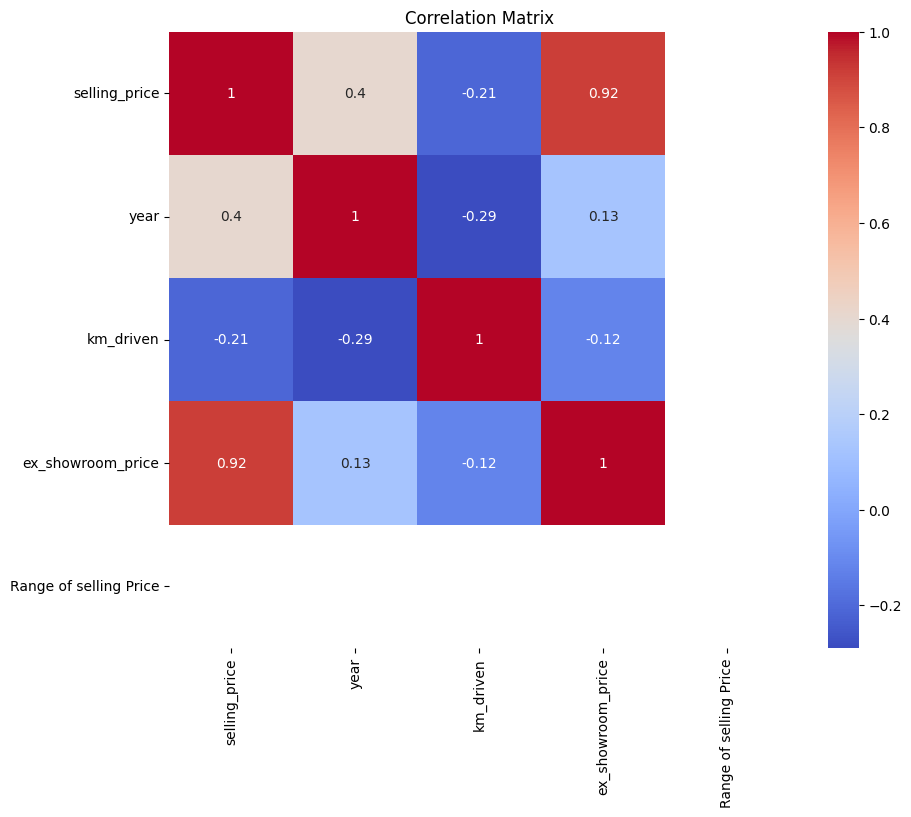

In [38]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

numeric_columns = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
